In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare


In [26]:
data  = pd.read_csv("HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# preprocess :

In [27]:
data["Parking"].replace(["True" , "False"]  , [1 , 0] , inplace=True)
data["Warehouse"].replace(["True" , "False"]  , [1 , 0] , inplace=True)
data["Elevator"].replace(["True" , "False"]  , [1 , 0] , inplace=True)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3469,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3470,75,2,False,False,False,Parand,3.650000e+08,12166.67
3471,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [28]:
data.drop("Address" , axis=1 , inplace=True)
data

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,3.500000e+09,116666.67
3469,83,2,True,True,True,6.800000e+09,226666.67
3470,75,2,False,False,False,3.650000e+08,12166.67
3471,105,2,True,True,True,5.600000e+09,186666.67


In [29]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


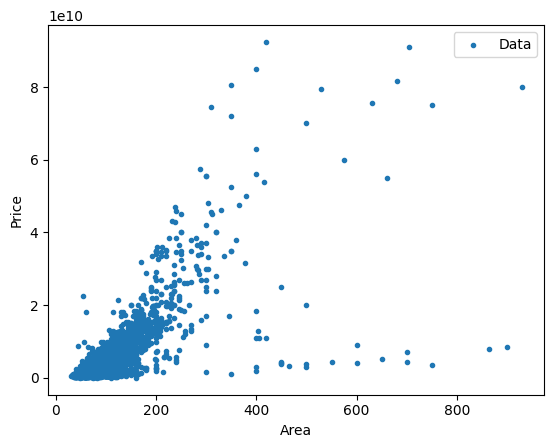

In [30]:
plt.scatter(data["Area"] , data["Price"] , marker=".")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["Data"])
plt.show()

In [31]:
# ba inke data dar bala khati  nist , miaim roosh lls fit mikonim ejbaran 

X = np.array(data[["Area"]])
Y = np.array(data[["Price"]])
X.shape , Y.shape

((3473, 1), (3473, 1))

In [34]:
x_train , x_test , y_train , y_test = train_test_split(X,Y)
x_train.shape , y_train.shape , x_test.shape , y_test.shape 

((2604, 1), (2604, 1), (869, 1), (869, 1))

In [39]:
lls = LinearLeastSquare()
lls.fit(x_train , y_train)
Y_PRED = lls.predict(x_test )


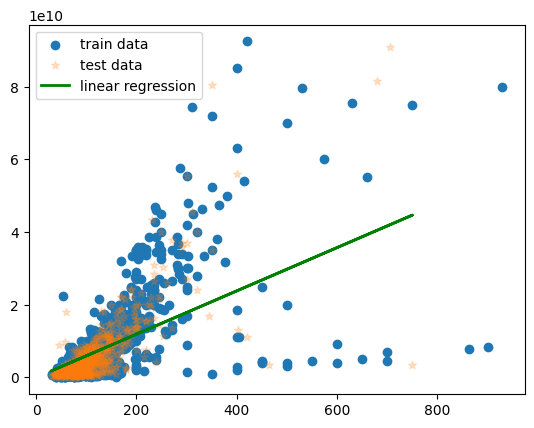

In [41]:
plt.scatter(x_train , y_train , marker="o")
plt.scatter(x_test , y_test , marker="*" , alpha=0.2) # test data
plt.plot(x_test , Y_PRED , color="green" , lw=2) # predictor line 
plt.legend(["train data" , "test data" , "linear regression" , "manual linear regression"] , loc="upper left")
plt.show()

In [42]:
lls.evaluate(x_test , y_test , "mae")
# 3 miliard toman khata dare 

3322485163.344276

# conclusion :
### in alg linear least square ke dar dataset sadaf ha be khataye kami resid va khoob rooshoon fit shod , inja khataye ziyadi dare


In [ ]:
# مزایای lls
### پیاده سازی راحت 
### سرعت بالای آموزش 
### سرعت بسیار بالای پیش بینی 
### در زمان پیش بینی به دیتای آموزش نیازی نیست
### نیازی به تنظیم هایپرپارامتر ندارد 
### الگوریتم کی ان ان تابع فیت اش سریع اجرا می شد ولی تابع پردیکتش به خاطر حلقه فور خیلی طول می کشید 

# معایب lls 
### فقط به درد مسایل خطی می خورد 
### فقط به درد مسایل رگرسیون می خورد 
### ممکن است ماتریس معکوس پذیر نباشد 
### در زمان ترین و اجرای تابع فیت همه دیتاهارو یکجا میخواد تا عملیات ضرب ماتریسی رو برای همه دیتاها یکجا انجام بدم
### ممکنه در لحظه آموزش همه دیتاها رو یکجا نداشته باشیم و دیتا ها کم کم داده بشه 
### باید الگوریتمی در این حالت داشته باشیم که کم کم ترین بشه 
### همه دیتاهای آموزش را در یک لحظه نیاز دارد و تک تک نمیتونه ترین کنه 

In [ ]:
# الگوریتم کی ان ان فقط به درد مسایل کلسیفیکیشن میخوره
# الگوریتم ال ال اس فقط به درد مسایل رگرسیون میخوره 
